# decision_tree_17march

In [1]:
#import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
#plot th DT
from sklearn import tree
from IPython.display import Image
from subprocess import check_call
#to make the image and dowload in pdf


In [3]:
import numpy as np
import seaborn as sns  #can be used for multicolinearity #it is a ploting tool
import matplotlib.pyplot as plt

In [4]:
#RFE (recusive feature elimination) feature selection technique
from sklearn.feature_selection import RFE

In [5]:
import pandas as pd

In [6]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/ecoli.csv"
ecoli=pd.read_csv(path)

In [7]:
ecoli.head()

,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [8]:
ecoli.shape

(336, 9)

In [9]:
#drop the column 'sequence name'
ecoli = ecoli.drop('sequence_name',axis=1)

In [10]:
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [11]:
#check for singularities 
ecoli.lip.value_counts()

0.48    326
1.00     10
Name: lip, dtype: int64

In [12]:
326/len(ecoli)  #case of singularity

0.9702380952380952

In [13]:
ecoli.chg.value_counts()

0.5    335
1.0      1
Name: chg, dtype: int64

In [14]:
335/len(ecoli)

0.9970238095238095

In [15]:
#check the distribution of Y-classes
ecoli.lsp.value_counts()
#it will be more biased towards cp ->42%

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: lsp, dtype: int64

In [16]:
143/len(ecoli)

0.4255952380952381

In [17]:
#shuffle the data since Y is grouped
ecoli = ecoli.sample(frac=1) #fraction with 100%

In [18]:
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
235,0.76,0.71,0.48,0.5,0.50,0.71,0.75,imU
257,0.57,0.38,0.48,0.5,0.06,0.49,0.33,imU
266,0.75,0.76,0.48,0.5,0.83,0.57,0.30,om
9,0.42,0.40,0.48,0.5,0.56,0.18,0.30,cp
74,0.24,0.43,0.48,0.5,0.37,0.28,0.38,cp


In [ ]:
#perform EDA


In [19]:
ecoli.isnull().sum()

mcg     0
gvh     0
lip     0
chg     0
aac     0
alm1    0
alm2    0
lsp     0
dtype: int64

In [20]:
#0 check 
ecoli[ecoli==0].count()

mcg     2
gvh     0
lip     0
chg     0
aac     1
alm1    0
alm2    1
lsp     0
dtype: int64

In [21]:
#split the data into train and test
trainx,testx,trainy,testy = train_test_split(ecoli.drop('lsp',axis=1),ecoli.lsp,test_size=0.2)

In [22]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(268, 7),trainy=(268,),testx=(68, 7),testy =(68,)


In [ ]:
#there 2 DT models
#1) Entropy model
#2) Gini model 
#ccp_alpha --> cost parameter 

In [23]:
#Entropy model - without HPT
m1=DecisionTreeClassifier(criterion='entropy').fit(trainx,trainy)

In [24]:
print(m1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [25]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

In [26]:
#plot the decision tree 
features = list(ecoli.columns)
features.remove('lsp')
classes =  ecoli.lsp.unique()

In [27]:
#create the tree
tree.export_graphviz(m1,'m1tree1.dot',filled=True,rounded=True,feature_names=features,class_names=classes)

In [28]:
#convert dot to image file
check_call(['dot','-Tpng','m1tree1.dot','-o','m1tree1.png'])


0

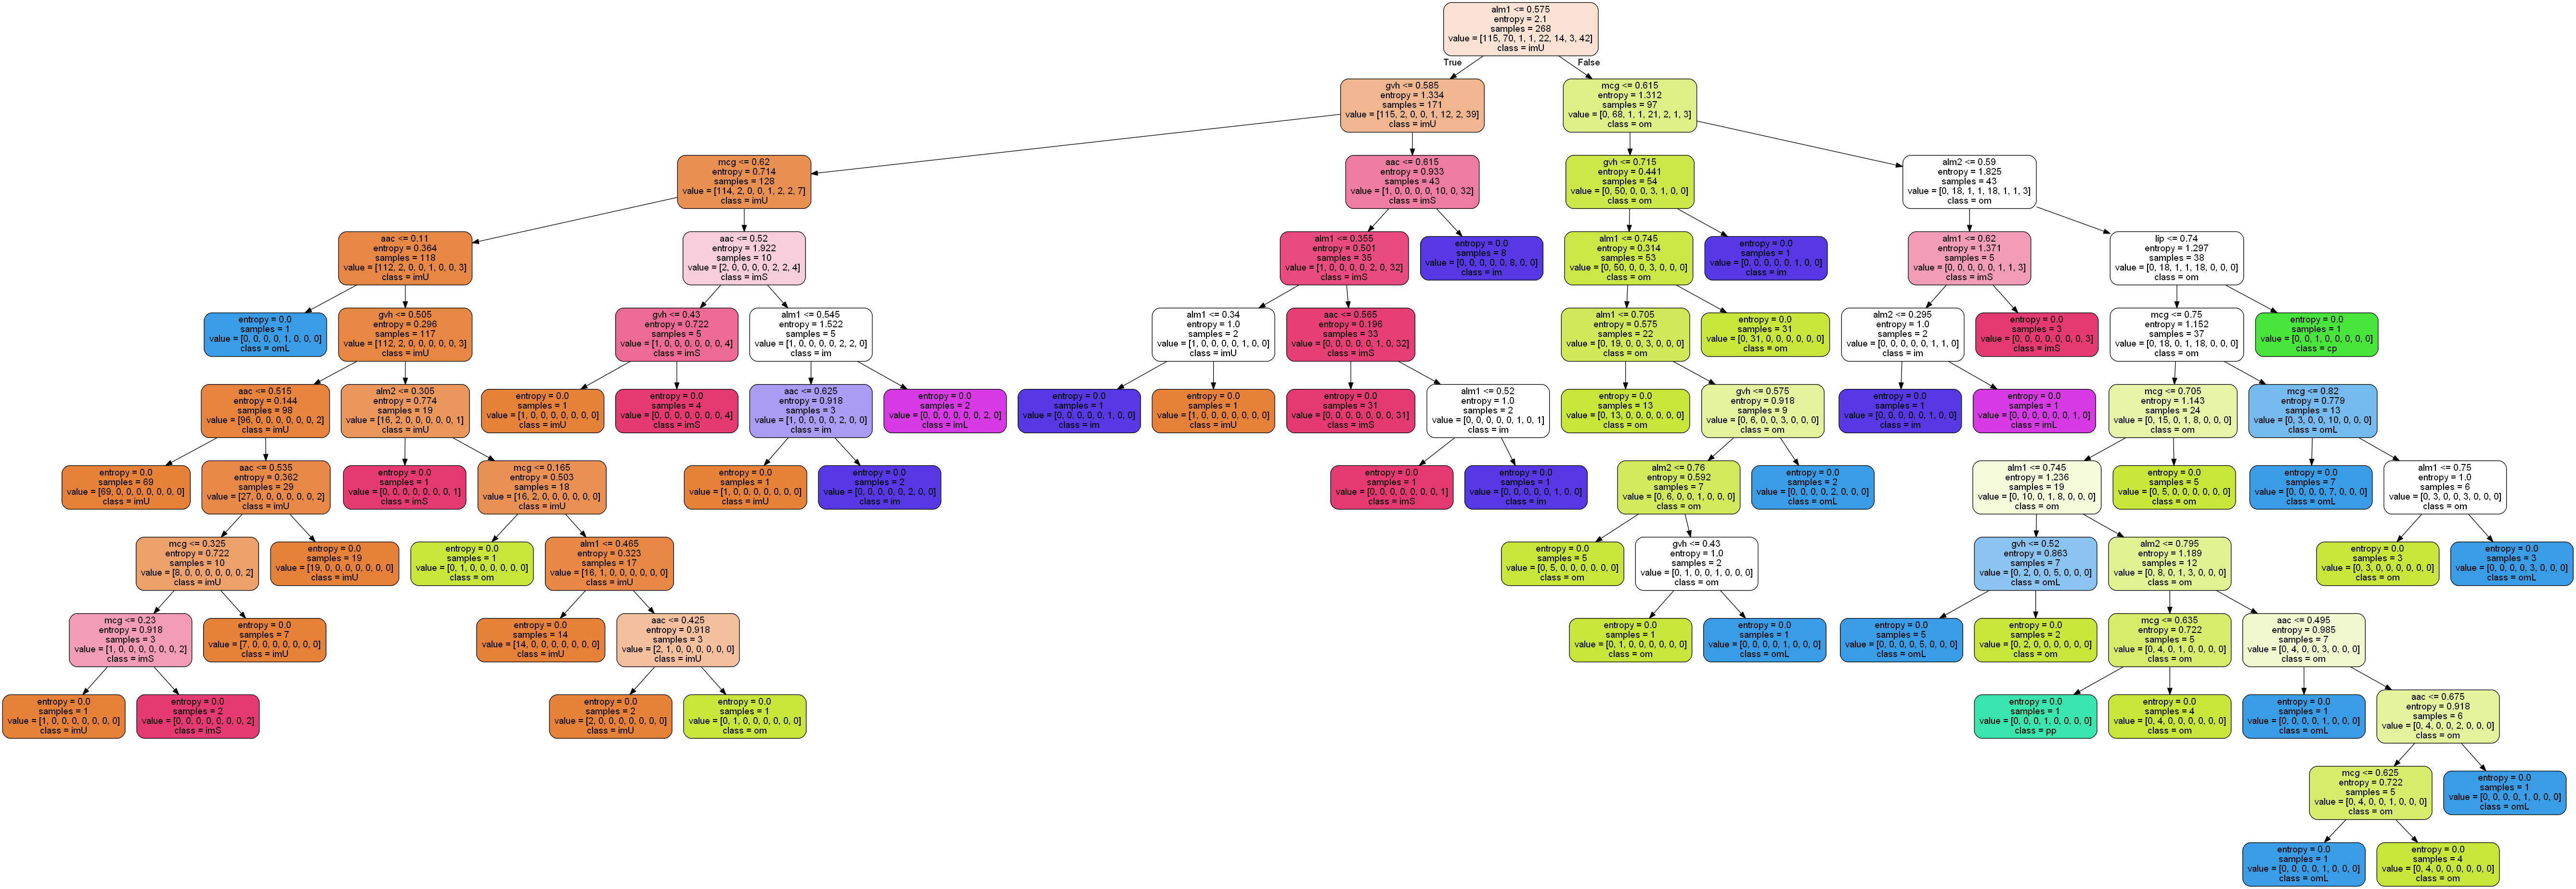

In [29]:
Image(filename='m1tree1.png')

In [30]:
#predictions 
p1=m1.predict(testx)

In [31]:
#confusion matrix/ classification report/ accuracy score
accuracy_score(testy,p1)

0.8088235294117647

In [32]:
#confusion matrix
confusion_matrix(testy,p1)

array([[27,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  2,  0,  7]], dtype=int64)

In [33]:
df= pd.DataFrame({'actual':testy,'predicted':p1})
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,cp,im,imU,om,pp,All
actual,,,,,,
cp,27,0,0,0,1,28
im,0,7,0,0,0,7
imL,0,0,0,0,1,1
imS,1,0,0,0,0,1
imU,0,5,8,0,0,13
om,0,0,0,6,0,6
omL,0,0,0,1,1,2
pp,0,0,1,2,7,10
All,28,12,9,9,10,68


In [34]:
print(classification_report(testy,p1))

              precision    recall  f1-score   support

          cp       0.96      0.96      0.96        28
          im       0.58      1.00      0.74         7
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.89      0.62      0.73        13
          om       0.67      1.00      0.80         6
         omL       0.00      0.00      0.00         2
          pp       0.70      0.70      0.70        10

    accuracy                           0.81        68
   macro avg       0.48      0.53      0.49        68
weighted avg       0.79      0.81      0.79        68



C:\Users\mayur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
24/29

0.8275862068965517

In [36]:
len(ecoli.lsp.unique())

8

In [37]:
#important features
m1.feature_importances_   #works on train data

array([0.1516292 , 0.22278166, 0.01185432, 0.        , 0.10489211,
       0.44514092, 0.06370179])

In [38]:
#create dataframe to store the features name and their scores
#higher score = high significance
impf= pd.DataFrame({'features':trainx.columns,'score':m1.feature_importances_})

In [39]:
#sort the data by scores in decreasing order
impf.sort_values('score',ascending=False,inplace=True)

Text(0, 0.5, 'Features')

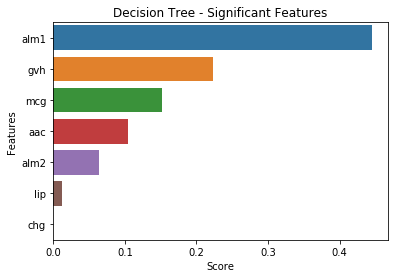

In [40]:
#plot the significant features
sns.barplot(x=impf.score,y=impf.features)
plt.title('Decision Tree - Significant Features')
plt.xlabel('Score')
plt.ylabel('Features')

In [41]:
#Decision Tree pruning 
dt_path = m1.cost_complexity_pruning_path(trainx,trainy)
dt_path

{'ccp_alphas': array([0.        , 0.00746269, 0.00746269, 0.00746269, 0.00746269,
        0.00799145, 0.00857786, 0.01023669, 0.01027943, 0.01027943,
        0.01332754, 0.01346881, 0.01346881, 0.01402397, 0.01409238,
        0.01538415, 0.01561087, 0.01638194, 0.01666047, 0.01811475,
        0.01811475, 0.01890141, 0.02108945, 0.02185913, 0.02489355,
        0.0268065 , 0.02985075, 0.03104182, 0.0338056 , 0.08320335,
        0.08427313, 0.09319811, 0.1089796 , 0.36030608, 0.77412815]),
 'impurities': array([0.        , 0.00746269, 0.01492537, 0.02238806, 0.02985075,
        0.0378422 , 0.06357577, 0.08404916, 0.09432859, 0.10460802,
        0.11793557, 0.13140437, 0.14487318, 0.15889715, 0.20117431,
        0.21655846, 0.2477802 , 0.29692601, 0.31358648, 0.33170123,
        0.34981598, 0.40652021, 0.42760966, 0.44946879, 0.47436234,
        0.50116883, 0.53101958, 0.5620614 , 0.59586699, 0.67907035,
        0.76334347, 0.85654158, 0.96552118, 1.32582726, 2.09995542])}

In [42]:
#cost compexity parameter values
ccp_alphas = dt_path.ccp_alphas 
ccp_alphas

array([0.        , 0.00746269, 0.00746269, 0.00746269, 0.00746269,
       0.00799145, 0.00857786, 0.01023669, 0.01027943, 0.01027943,
       0.01332754, 0.01346881, 0.01346881, 0.01402397, 0.01409238,
       0.01538415, 0.01561087, 0.01638194, 0.01666047, 0.01811475,
       0.01811475, 0.01890141, 0.02108945, 0.02185913, 0.02489355,
       0.0268065 , 0.02985075, 0.03104182, 0.0338056 , 0.08320335,
       0.08427313, 0.09319811, 0.1089796 , 0.36030608, 0.77412815])

In [43]:
#find the best ccp_alpha value
results = []
for cp in ccp_alphas:
    m = DecisionTreeClassifier(ccp_alpha = cp).fit(trainx,trainy)
    results.append(m)
results    

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.007462686567164179, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=None,
                        splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.007462686567164179, class_weight=None,
                

In [44]:
#calculate the accuracy scores for train and test data
trg_score = [r.score(trainx,trainy)for r in results]
test_score = [r.score(testx,testy)for r in results]

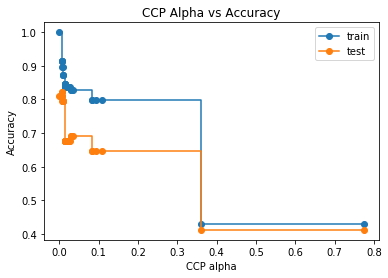

In [45]:
#plot the scores
fig,ax = plt.subplots()
ax.plot(ccp_alphas,trg_score,marker='o',label='train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_score,marker='o',label='test',drawstyle='steps-post')
ax.set_xlabel("CCP alpha")
ax.set_ylabel("Accuracy")
ax.set_title("CCP Alpha vs Accuracy")
ax.legend()
#these are the accuracy of train and test distance(alpha) between them should be less to 

In [46]:
#based on the graph , the best ccp_alpha=0.023
#build model with this ccp_alpha value
#for better results, experiment with the ccp_alpha values
m1_1=DecisionTreeClassifier(criterion='entropy',ccp_alpha = 0.023).fit(trainx,trainy)
p1_1 = m1_1.predict(testx)
p1_1

array(['im', 'cp', 'om', 'im', 'cp', 'pp', 'cp', 'cp', 'cp', 'om', 'cp',
       'im', 'om', 'im', 'cp', 'cp', 'cp', 'cp', 'pp', 'pp', 'im', 'im',
       'cp', 'cp', 'pp', 'im', 'im', 'cp', 'cp', 'cp', 'pp', 'pp', 'cp',
       'pp', 'cp', 'om', 'cp', 'im', 'om', 'im', 'cp', 'im', 'im', 'pp',
       'im', 'im', 'cp', 'pp', 'im', 'cp', 'cp', 'im', 'om', 'cp', 'im',
       'im', 'cp', 'im', 'pp', 'im', 'cp', 'om', 'cp', 'pp', 'om', 'im',
       'cp', 'cp'], dtype=object)

In [47]:
p1_1

array(['im', 'cp', 'om', 'im', 'cp', 'pp', 'cp', 'cp', 'cp', 'om', 'cp',
       'im', 'om', 'im', 'cp', 'cp', 'cp', 'cp', 'pp', 'pp', 'im', 'im',
       'cp', 'cp', 'pp', 'im', 'im', 'cp', 'cp', 'cp', 'pp', 'pp', 'cp',
       'pp', 'cp', 'om', 'cp', 'im', 'om', 'im', 'cp', 'im', 'im', 'pp',
       'im', 'im', 'cp', 'pp', 'im', 'cp', 'cp', 'im', 'om', 'cp', 'im',
       'im', 'cp', 'im', 'pp', 'im', 'cp', 'om', 'cp', 'pp', 'om', 'im',
       'cp', 'cp'], dtype=object)

In [48]:
df1_1 = pd.DataFrame({'actual':testy,'predicted':p1_1})


In [49]:
pd.crosstab(df1_1.actual,df1_1.predicted,margins=True)
print(classification_report(testy,p1_1))

              precision    recall  f1-score   support

          cp       0.96      0.96      0.96        28
          im       0.33      1.00      0.50         7
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.00      0.00      0.00        13
          om       0.75      1.00      0.86         6
         omL       0.00      0.00      0.00         2
          pp       0.64      0.70      0.67        10

    accuracy                           0.69        68
   macro avg       0.34      0.46      0.37        68
weighted avg       0.59      0.69      0.62        68



C:\Users\mayur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# 2 Entropy model with hyperparameter
m2 = DecisionTreeClassifier(criterion='entropy',
                            max_depth=2,
                            min_samples_leaf=3).fit(trainx,trainy)



In [51]:
p2=m2.predict(testx)
p2


array(['im', 'cp', 'cp', 'im', 'cp', 'pp', 'cp', 'cp', 'cp', 'cp', 'cp',
       'im', 'pp', 'im', 'cp', 'cp', 'cp', 'cp', 'pp', 'cp', 'im', 'im',
       'cp', 'cp', 'cp', 'im', 'im', 'cp', 'cp', 'cp', 'pp', 'pp', 'cp',
       'cp', 'cp', 'pp', 'cp', 'im', 'pp', 'im', 'cp', 'im', 'im', 'im',
       'im', 'im', 'cp', 'pp', 'im', 'cp', 'cp', 'im', 'cp', 'cp', 'im',
       'im', 'cp', 'im', 'pp', 'im', 'pp', 'pp', 'cp', 'pp', 'pp', 'im',
       'cp', 'cp'], dtype=object)

In [52]:
df2 = pd.DataFrame({'actual':testy,'predicted':p1})
pd.crosstab(df2.actual,df2.predicted,margins=True)
print(classification_report(testy,p2))

              precision    recall  f1-score   support

          cp       0.85      1.00      0.92        28
          im       0.32      1.00      0.48         7
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.00      0.00      0.00        13
          om       0.00      0.00      0.00         6
         omL       0.00      0.00      0.00         2
          pp       0.69      0.90      0.78        10

    accuracy                           0.65        68
   macro avg       0.23      0.36      0.27        68
weighted avg       0.48      0.65      0.54        68



C:\Users\mayur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# feature  selection 

#next models m3 and m4
#criterion ="gini"
#follow the same steps as above

In [53]:
#feature selection -Method 2  -- >#RFE (recursive feature Elimination)
cols = list(testx.columns)   #works on test data


In [54]:

m1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
#specify the number of significant features you want from the model 
features = 3
rfe= RFE(m1,features).fit(testx,testy)
support = rfe.support_
ranking = rfe.ranking_
#store the results in dataframes
df_rfe = pd.DataFrame({'feature':cols,'support':support,'rank':ranking})
#sort the dataframe by rank
df_rfe.sort_values('rank',ascending =True,inplace=True)
print(df_rfe)

  feature  support  rank
0     mcg     True     1
1     gvh     True     1
5    alm1     True     1
4     aac    False     2
2     lip    False     3
6    alm2    False     4
3     chg    False     5
